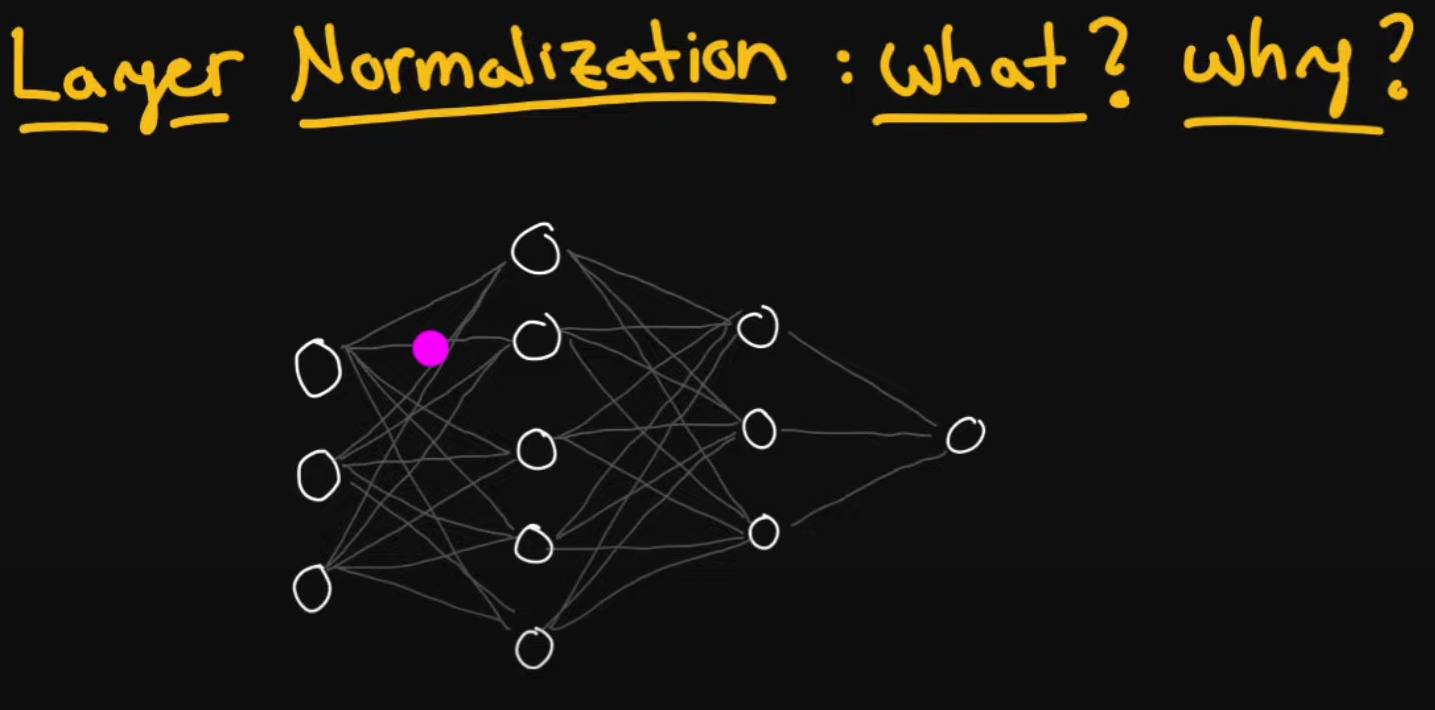

**What is layer normalization?**

Normalization:

    Scale the large range of values very close and centered around 0
    
    Enables for faster and safer training

Layer Normalization:

    How we apply normalization to a layer 

    The technique that we use

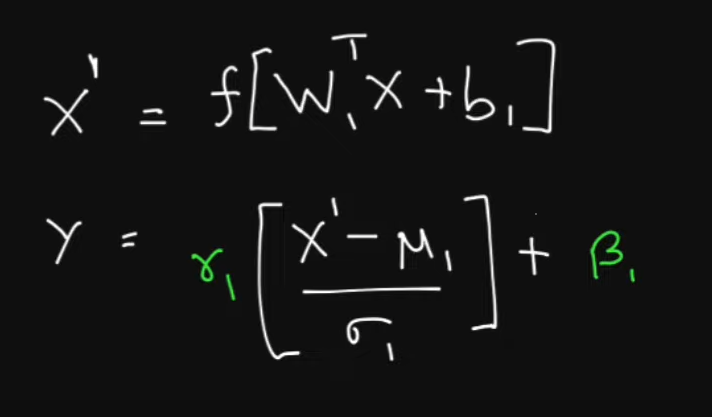

x' is the original formula without normalization

y is the formula with normalization

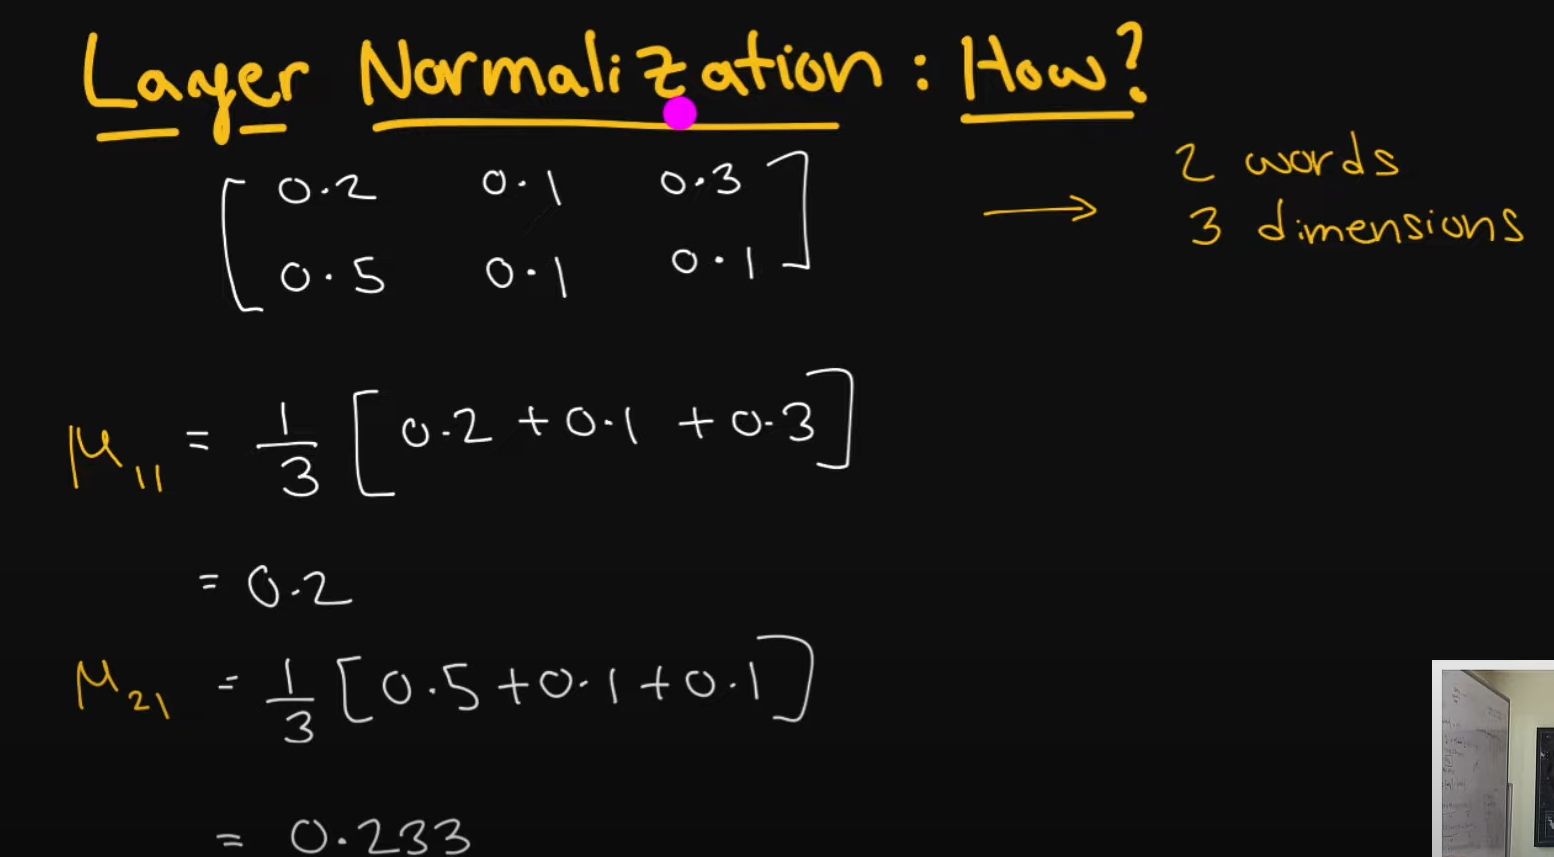

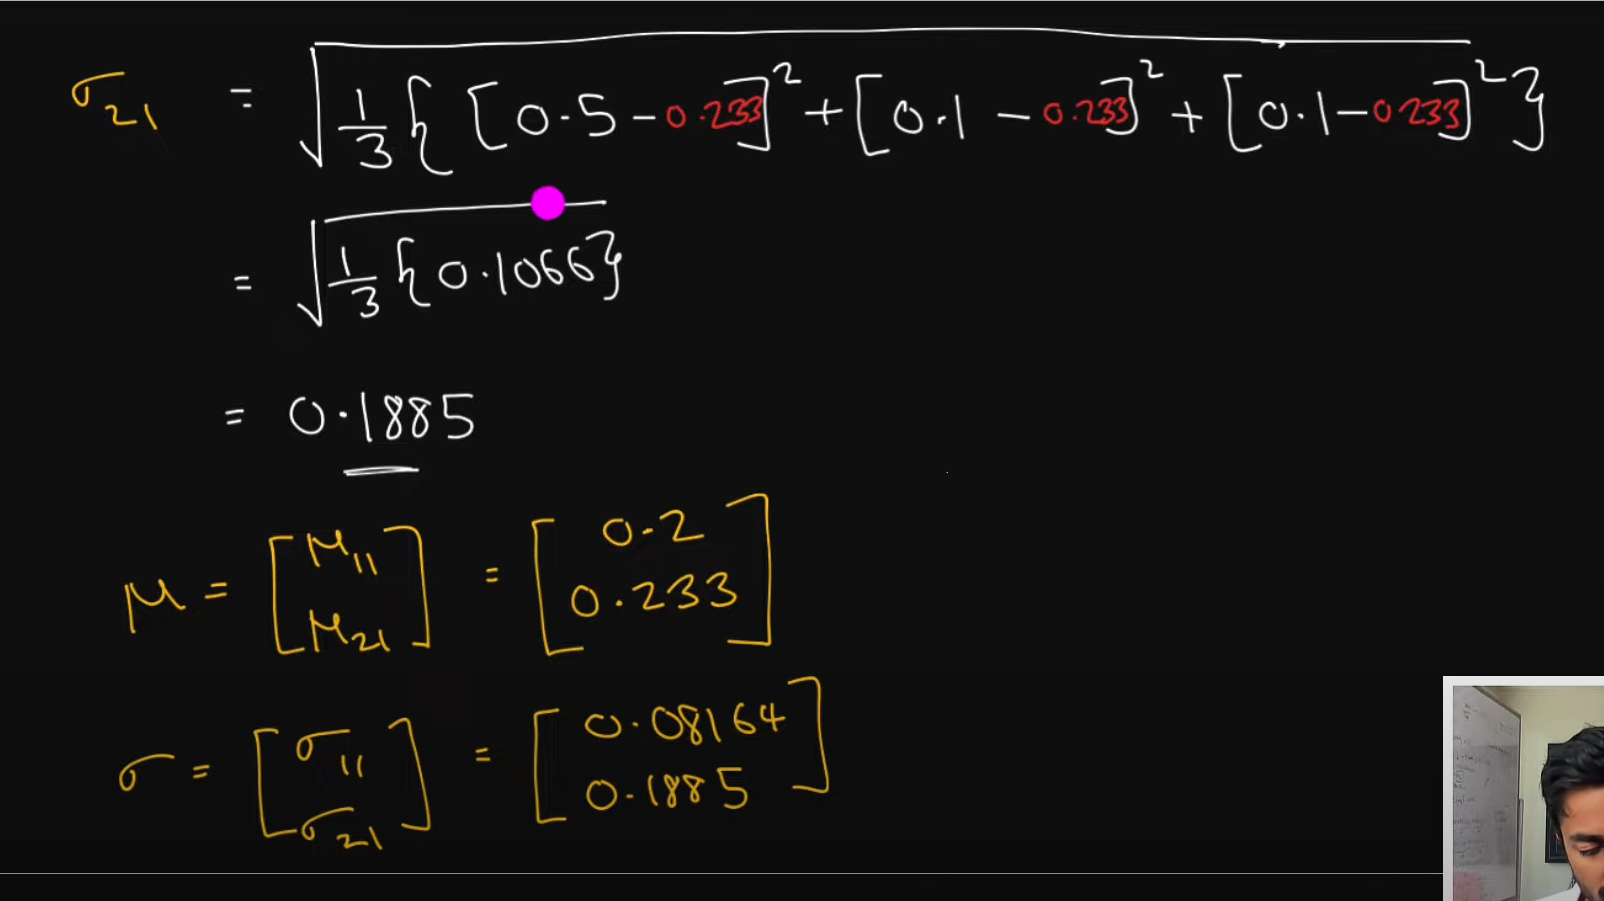

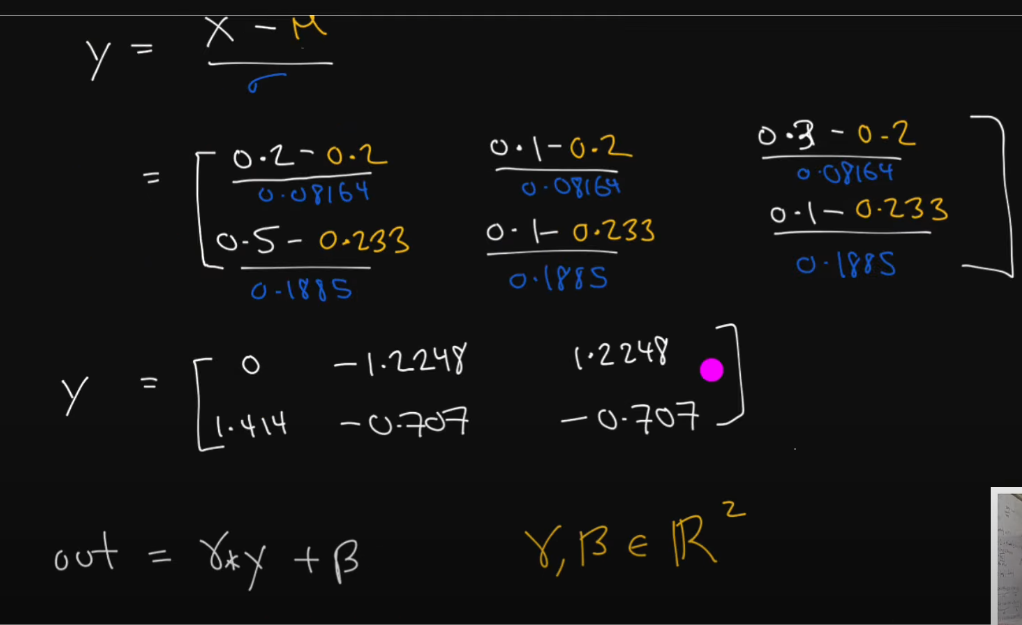

Example layer normalization calculations.

In [16]:
import torch
from torch import nn

In [17]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3], [0.5, 0.1, 0.1]]])
B, S, E = inputs.size()
inputs = inputs.reshape(S, B, E)    # [Number of words, batch size, embedding for each batch]
inputs.size()

torch.Size([2, 1, 3])

In [18]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape)) # Standard deviations
beta = nn.Parameter(torch.zeros(parameter_shape)) # Zeros

In [19]:
gamma.size(), beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [20]:
# The dimensions for which we want to compute layer normalization
#   batch dimension
#   embedding dimension
dims = [-(i + 1) for i in range(len(parameter_shape))]
dims

[-1, -2]

In [21]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [22]:
mean

tensor([[[0.2000]],

        [[0.2333]]])

In [23]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (var + epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [24]:
y = (inputs - mean) / std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [25]:
# The addbackwards is a learnable parameter that is going to be updated during the backpropagation
out = gamma * y + beta
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

In [26]:
import torch
from torch import nn

class LayerNormalization():
    def __init__(self, parameter_shape, eps=1e-5):
        self.parameters_shape=parameter_shape
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(parameter_shape))
        self.beta = nn.Parameter(torch.zeros(parameter_shape))

    def forward(self, input):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation \n ({std.size()}): \n {std}")
        y = (inputs - mean) / std
        print(f"y \n ({y.size()}): \n {y}")
        out = self.gamma * y + self.beta
        print(f"out \n ({out.size()}): \n {out}")
        return out

In [27]:
batch_size = 3
sentence_length = 5
embedding_dim = 8
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}): \n {inputs}")

input 
 (torch.Size([5, 3, 8])): 
 tensor([[[-1.4890, -1.2931, -0.7269, -1.5651,  2.3023, -0.1289, -0.2493,
           1.6988],
         [ 0.7226,  0.6497, -0.0841,  0.2497, -0.3073,  0.9641, -1.2511,
           1.4044],
         [ 0.4731,  0.4230, -1.0553,  0.3262, -0.9807,  0.6255, -1.4181,
          -0.7874]],

        [[ 0.9885,  0.7259,  1.1080, -1.2058, -2.3574,  1.5052, -0.4031,
           0.0705],
         [ 0.1689, -1.5957,  0.2803,  1.5368, -1.6731,  0.5238, -0.2294,
           1.5542],
         [-1.4258,  0.3971, -0.7715, -0.3323,  0.3177,  0.1484, -1.9367,
          -1.2626]],

        [[-1.8958,  1.6860,  1.5464, -1.8114,  1.0522, -1.0269,  1.2286,
           2.2200],
         [-0.7166, -0.4677,  0.1239, -0.6585, -1.1620,  0.6141, -0.3140,
           1.2838],
         [ 1.7935,  0.6871,  1.3179,  2.6391,  1.0599,  0.7614, -0.2527,
           0.6192]],

        [[-0.2959, -0.0773, -0.2090,  0.3973,  0.3773,  0.0570,  0.3505,
          -1.7107],
         [-2.2705, -0.8933, -

In [28]:
layer_norm = LayerNormalization(inputs.size()[-2:])

In [29]:
out = layer_norm.forward(inputs)

Mean 
 (torch.Size([5, 1, 1])): 
 tensor([[[-0.0624]],

        [[-0.1612]],

        [[ 0.4303]],

        [[-0.0843]],

        [[-0.0741]]])
Standard Deviation 
 (torch.Size([5, 1, 1])): 
 tensor([[[1.0453]],

        [[1.1268]],

        [[1.2155]],

        [[0.8073]],

        [[0.9641]]])
y 
 (torch.Size([5, 3, 8])): 
 tensor([[[-1.3649, -1.1774, -0.6358, -1.4377,  2.2623, -0.0636, -0.1788,
           1.6849],
         [ 0.7510,  0.6812, -0.0208,  0.2986, -0.2343,  0.9820, -1.1373,
           1.4033],
         [ 0.5123,  0.4644, -0.9499,  0.3718, -0.8786,  0.6581, -1.2971,
          -0.6936]],

        [[ 1.0203,  0.7872,  1.1263, -0.9270, -1.9490,  1.4788, -0.2147,
           0.2056],
         [ 0.2929, -1.2731,  0.3918,  1.5069, -1.3417,  0.6079, -0.0605,
           1.5223],
         [-1.1223,  0.4954, -0.5416, -0.1518,  0.4249,  0.2747, -1.5757,
          -0.9775]],

        [[-1.9137,  1.0330,  0.9182, -1.8442,  0.5116, -1.1988,  0.6568,
           1.4724],
         [-0.9436